In [ ]:
# CONSTRAIN

# Types OF Constrain
#----------------------------------------------------------------------
# NOT NULL             Field must have value
# UNIQUE               Only unique values are allowed
# DEFAULT              Ability to set default value
# PRIMARY KEY          Unique identifier to each rows
# FOREIGN KEY          Constrain data based on columns in other table
# CHECK                Check all value to meet certain criteria


# NOT NULL
CREATE TABLE table_nn(
	id SERIAL PRIMARY KEY,
	tag TEXT NOT NULL,
)

# If insert into column who values is NULL raise an error
# Biasanya dipake pada DB yang ga bole Kosong di row nya : misal transactional
INSERT INTO table_nn (tag) VALUES (NULL)

--------------------------------------------------------------------------------------------------------------------

# UNIQUE
# Use when you need every row in column is UNIQUE : that is you unable to make same character again
# In this sample, i use email inserted twice, first one is inserted, second one fail (raise an error)
# Same as number product, barcode, etc
CREATE TABLE table_emails(
	id SERIAL PRIMARY KEY,
	emails TEXT UNIQUE
)


INSERT INTO table_emails (emails) VALUES ('aajb@gmail.com')

--------------------------------------------------------------------------------------------------------------------

# DEFAULT VALUE

CREATE TABLE employees(
	employee_id SERIAL PRIMARY KEY, 
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	is_enable VARCHAR(2) DEFAULT 'Y'
)


# is_enable value will be default in 'Y' when column not use
INSERT INTO employees (first_name, last_name) 
VALUES ('Heri', 'Ganteng')

employee_id|first_name|last_name|is_enable|
-----------+----------+---------+---------+
          1|Heri      |Ganteng  |Y        |

    
# But when you use it will used your value
INSERT INTO employees (first_name, last_name, last_name) 
VALUES ('Heri', 'Ganteng', 'N')

employee_id|first_name|last_name|is_enable|
-----------+----------+---------+---------+
          1|Heri      |Ganteng  |Y        |
          2|Heri      |Ganteng  |N        |
        

In [ ]:
# PRIMARY KEY 

# It will be create an unique identifier to each row with SERIAL
# Related use to connecting table
CREATE TABLE primary_cons (
    primary_id SERIAL PRIMARY KEY,
    first_name VARCHAR(50),
	last_name VARCHAR(50),
)


In [ ]:
# COMPOSITE KEY 

# Composite primary keys is a use case when entries in your dataset 
# can’t be uniquely identified by a single column value but a combination of column values can

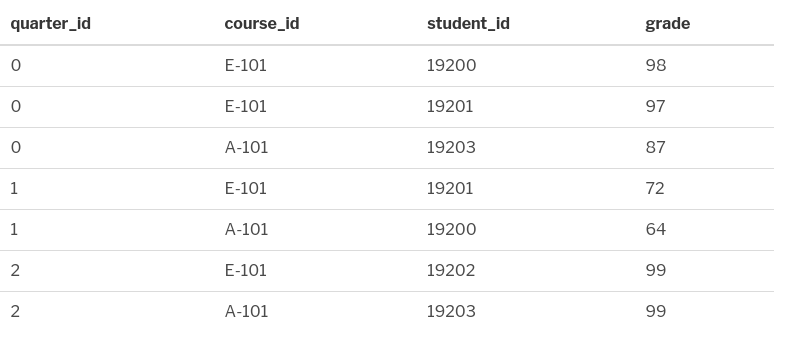

In [ ]:
# Without any id numbers it can be hard to figure out uniqueness. 
# We can see that quarter_id’s are duplicated so that is not unique. 
# We can see that courses are duplicated so that’s not unique. 

# To guarantee uniqueness in a situation like this we can combine quarter_id, course_id, and student_id. 
# The combination of those will always be unique.
# Intinya ga boleh sama ke 2 row yang akan dimasukan
CREATE TABLE course_grades (
    quarter_id INTEGER,
    course_id TEXT,
    student_id INTEGER,
    grade INTEGER,
    PRIMARY KEY(quarter_id, course_id, student_id)
);


In [ ]:
# FOREIGN KEY

# A set group of key in table  that reference on another table
# Parent table - Child/Foriegn Table

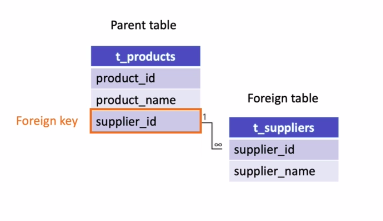

In [ ]:
# Table Without Foreign Key

CREATE TABLE t_products(
	product_id INT PRIMARY KEY,
	product_name VARCHAR(100),
	supplier_id INT NOT NULL
)

CREATE TABLE t_suppliers (
	supplier_id INT PRIMARY KEY,
	supper_name VARCHAR (100) NOT NULL
);

# Result of inserted without foreign key will be a duplicated on product_name 
# The problem of this process is data integrity & query result will make hard to read in the end
# Normalization plays important role in this one (data integrity and uniqueness of ro)
INSERT INTO t_products (product_id, product_name, supplier_id)
VALUES (1, 'PEN', 1), (2, 'PAPER', 2)

INSERT INTO t_products (product_id, product_name, supplier_id) 
VALUES (4, 'COMPUTER', 100)


product_id|product_name|supplier_id|
----------+------------+-----------+
         1|PEN         |          1|
         2|PAPER       |          2|
         3|COMPUTER    |         10|
         4|COMPUTER    |        100|

In [ ]:
# REFERENTIAL DATA INTEGRITY

CREATE TABLE t_products(
	product_id INT PRIMARY KEY,
	product_name VARCHAR(100),
	supplier_id INT NOT NULL,
	FOREIGN KEY (supplier_id) REFERENCES t_suppliers (supplier_id)
)

CREATE TABLE t_suppliers (
	supplier_id INT PRIMARY KEY,
	supper_name VARCHAR (100) NOT NULL
);

INSERT INTO t_suppliers (supplier_id, supper_name)
VALUES (1, 'SUPPLIER1'), (2, 'SUPPLIER2')

INSERT INTO t_products (product_id, product_name, supplier_id) 
VALUES (1, 'PEN', 2), (2, 'PAPER', 1)


SELECT * FROM t_suppliers

supplier_id|supper_name|
-----------+-----------+
          1|SUPPLIER1  |
          2|SUPPLIER2  |
                
        
SELECT * FROM t_products

product_id|product_name|supplier_id|
----------+------------+-----------+
         1|PEN         |          2|
         2|PAPER       |          1|
        

# Unable inserted this raise an error,because in second value, supplier_id = 100, whics is not t_supplier
INSERT INTO t_products (product_id, product_name, supplier_id) 
VALUES (1, 'PEN', 2), (2, 'PAPER', 100)



# Drop Referential Constrain

# Use this for drop constrain when dealing with multiple relation table
ALTER TABLE t_products
DROP CONSTRAINT t_products_supplier_id_fkey


# Update Referential Constrain

# Use this for update constrain when dealing with multiple relation table
ALTER TABLE t_products
ADD t_products_supplier_id_fkey FOREIGN KEY (supplier_id) REFERENCES t_suppliers (supplier_id)

In [ ]:
# CHECK CONSTRAIN

# Check if specific columns meet your data requirement such as : salary > 0 || product > 0
# If inserted -10 or not meet that requirement, postgres will raise an error

# All data type can be make by this CHECK constrain

CREATE TABLE check_salary (
    salary id SERIAL PRIMARY KEY,
    first_name VARCHAR(100),
    last_name VARCHAR(100),
    salary numeric CHECK (salary > 0)
)

# Raise an error : because salary < 0
INSERT INTO check_salary (first_name, last_name, salary)
VALUES ('Hana', 'Hanif', -300)

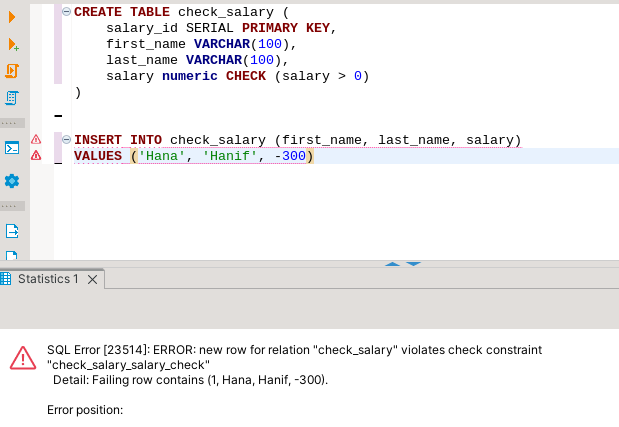

In [ ]:
# NO constrain vioalation
INSERT INTO check_salary (first_name, last_name, salary)
VALUES ('Hana', 'Hanif', 200)

In [ ]:
# Add, Rename, Drop CHECK Constraint

CREATE TABLE prices ( 
	price_id SERIAL PRIMARY KEY,
	product_id INT NOT NULL,
	price NUMERIC NOT NULL,
	discount NUMERIC NOT NULL,
	valid_from DATE NOT NULL
)

# First change to table to add constraint
ALTER TABLE prices 
ADD CONSTRAINT price_check
CHECK (
	price > 0
	AND discount >=0 
	AND price > discount 
)

# Second change to table to rename column
ALTER TABLE prices
RENAME CONSTRAINT price_check TO price_discount_check

# Third change to table to drop column
DROP TABLE prices 
DROP CONSTRAINT price_discount_check 
